# Titanic Project ML - Part 1 - Work In Progress

"""
Author: Jennifer Yoon  
Date: 9/26/2018 draft, work in progress    
File: titanic-part1.ipynb     

Description:  A Reproduction work based on Cyrille Rossant's book.  
Source:  Rossant, Cyrille, <u>IPython Interactive Computing and Visualization Cookbook</u>, 2nd ed., Packt Publishing, 2018, ISBN 978-1-78588-863-2, Chp. 8 Machine Learning    
  
Additional Source:  Matplotlib.org Tutorials: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py  
  
Additional Source:  VanderPlas, Jake, <u>Python Data Science Handbook</u>, O'Reilly Media Inc., Copyright 2017, Chp. 4 Visualizing with Matplotlib.  
  
"""

### Package Imports 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

### Data Step

In [2]:
# Load training datasets using Pandas dataframe object.

# Input parameters.
param1 = ('https://github.com/ipython-books'
         '/cookbook-2nd-data/blob/master/'
         'titanic_train.csv?raw=true')
# print("param1:\n", param1)

param2 = ('https://github.com/ipython-books'
         '/cookbook-2nd-data/blob/master/'
         'titanic_test.csv?raw=true')
# print("param2:\n", param2)

In [3]:
# Commands.
train = pd.read_csv(param1)
test = pd.read_csv(param2)
train[train.columns[[2, 4, 5, 1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [4]:
print(len(train.columns))
print(len(train))
print(type(train))
# Dataframe has 12 columns, 891 rows, and is a DataFrame type.

12
891
<class 'pandas.core.frame.DataFrame'>


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Descriptive statistics on training data.
# Average, stdev, min, max, count, nas.
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analysis - Train Data  
There were 891 observations for all columns except age, which has some missing data.  The count for age is 714. Fare paid varies wildly from 0.0 to 512.3292 units, possibly pounds.  The 50th percentile fare was 14.4542 units, and was still in Pclass 3.  Most passengers were classified as Pclass 3. The 25th percentile passenger is still classified as Pclass 2, with a fare of 7.9 units. Let's graph the fare information.


In [7]:
# Select fields for fare, pclass, survived, sex.
data = train[['Survived', 'Fare', 'Pclass', 'Sex']]
data.head()

,Survived,Fare,Pclass,Sex
0,0,7.2500,3,male
1,1,71.2833,1,female
2,1,7.9250,3,female
3,1,53.1000,1,female
4,0,8.0500,3,male


In [8]:
y = data[['Survived']]
x1 = data[['Fare']]
x2 = data[['Pclass']]


### Do more plots

In [9]:
# Matplotlib Subplots -- different source

In [10]:
# Select fields, convert sex field to binary, remove rows with NaN values.
data = train[['Age', 'Pclass', 'Survived']]
print(data.head())
# Add a female binary sex column.
data = data.assign(Female = train['Sex'] == 'female')
print(data.head())
# Reorder the columns.
data = data[['Female', 'Age', 'Pclass', 'Survived']]
# Drop rows with NaN, missing values.
data = data.dropna()
print("\nRows remaining in training data:", len(data))
data.head()

    Age  Pclass  Survived
0  22.0       3         0
1  38.0       1         1
2  26.0       3         1
3  35.0       1         1
4  35.0       3         0
    Age  Pclass  Survived  Female
0  22.0       3         0   False
1  38.0       1         1    True
2  26.0       3         1    True
3  35.0       1         1    True
4  35.0       3         0   False

Rows remaining in training data: 714


,Female,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


In [11]:
# Convert data object from Pandas DataFrame to NumPy array inorder to use it in Scikit-Learn.
datanp = data.astype(np.int32).values
X = datanp[:, :-1]  # Selects all columns except last column. Capital X.
Y = datanp[:, -1]   # Selects last column only. Capital Y.
print("X 2d array, 'Female, Age, Pclass': \n", X[0:5])
print("Y 1d array, 'Survived': \n", Y[0:5])

X 2d array, 'Female, Age, Pclass': 
 [[ 0 22  3]
 [ 1 38  1]
 [ 1 26  3]
 [ 1 35  1]
 [ 0 35  3]]
Y 1d array, 'Survived': 
 [0 1 1 1 0]


In [12]:
# Check that the number of rows is unchanged from before conversion.
len(datanp)  

714

### Male & Female Survivors 

In [13]:
# We define a few boolean vectors.
# The first column is 'Female'.
female = X[:, 0] == 1

# The last column is 'Survived'.
survived = Y == 1

# This vector contains the age of the passengers.
age = X[:, 1]

In [14]:
print(female[0:5])
print(survived[0:5])
print(age[0:5])
len(survived)

[False  True  True  True False]
[False  True  True  True False]
[22 38 26 35 35]


714

In [15]:
# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female],
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female],
                            bins=bins_)[0]}

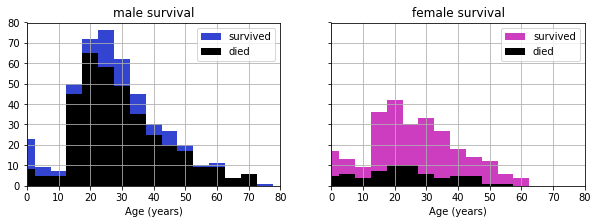

In [16]:
# We now plot the data.
bins = bins_[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=5, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=5, label='died')
    ax.set_xlim(0, 80)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

    

In [17]:
# Try different bins.
binsp = np.arange(0, 100, 3)
S = {'male': np.histogram(age[survived & ~female],
                          bins=binsp)[0],
     'female': np.histogram(age[survived & female],
                            bins=binsp)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=binsp)[0],
     'female': np.histogram(age[~survived & female],
                            bins=binsp)[0]}

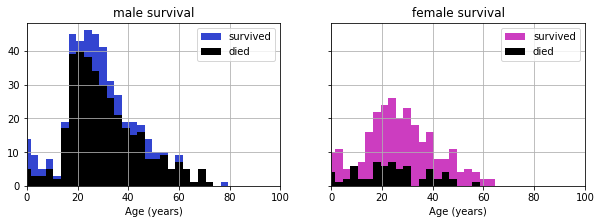

In [18]:
# We now plot the data.
bins = binsp[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=3, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=3, label='died')
    ax.set_xlim(0, 100)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

### Analysis - Male and Female Histograms
These histograms seem to indicate that higher percentage of female passengers survived than male passengers. Also note that there were greater number of male passengers than female passengers on borad across most age groups.  Also there were no female passengers past mid 60's, where as male passenger age went up to 81 years. Since it may be reasonable to assume that the ratio of female to male in the greater population was close to 1 to 1, the over representation of male passengers, almost 2 to 1 male to female, may indicate some non-randomness in the sex selection of passengers.

Titanic was a luxury, state-of-the-art ship and a cross-Atlantic voage at a time when these features were highly unusual.  It would be interesting to study more common boating trips in local areas during the same time period, and see if those trips also exhibited higher female survival rates.

## Continued in Part 2

In [19]:
# Additional EDA, min/max, std.  Other features summary statistics.